In [1]:
from source.datasets import get_dataloader_one
from source.model import Model, train
from source.NoiseScheduler import NoiseScheduler
from source.utils import sample, make_gif_one

from dataclasses import dataclass

import matplotlib.pyplot as plt

import torch

device = None
if torch.cuda.is_available():               # Apple Silicon
    device = torch.device('cuda')
elif torch.backends.mps.is_available():     # CUDA
    device = torch.device('mps')
else:                                       # CPU
    device = torch.device('cpu')

print(f'Using device: {device}')

Using device: mps


In [2]:
@dataclass
class ModelConfig:
    # general
    device: str

    # architecture
    time_embed_scale: float = 25.0
    input_embed_scale: float = 25.0
    time_embed_dim: int = 256
    input_embed_dim: int = 256
    n_layers: int = 4
    hidden_dim: int = 512

    # noise schedule
    beta0: float = 1e-4
    betaT: float = 2e-2
    T: int = 400
    schedule_type: str = "sigmoid"

    # training
    batch_size: int = 128
    n_epochs: int = 200
    lr: float = 5e-4
    dropout: float = 0.2

In [3]:
config = ModelConfig(device=device)

In [4]:
dataloader = get_dataloader_one("data/one", batch_size=config.batch_size)
model = Model(config).to(device)
noise_scheduler = NoiseScheduler(config)

losses = train(model, config, noise_scheduler, dataloader)

Epoch 0, loss=0.37274, lr=0.0005
Epoch 20, loss=0.28063, lr=0.0005
Epoch 40, loss=0.27408, lr=0.00025
Epoch 60, loss=0.27438, lr=0.00025
Epoch 80, loss=0.27352, lr=0.000125
Epoch 100, loss=0.26824, lr=3.125e-05
Epoch 120, loss=0.26213, lr=1.5625e-05
Epoch 140, loss=0.26734, lr=7.8125e-06
Epoch 160, loss=0.26502, lr=1.953125e-06
Epoch 180, loss=0.26411, lr=4.8828125e-07


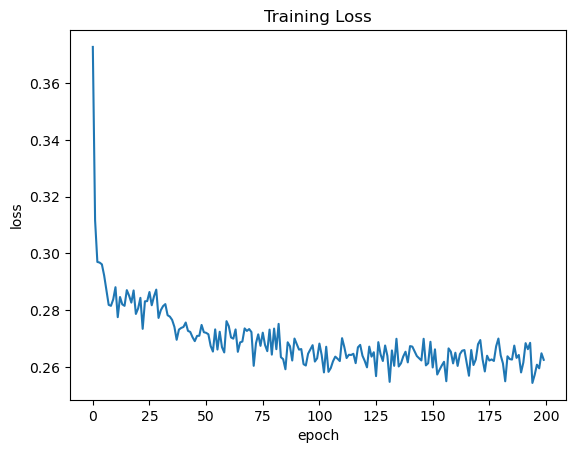

In [5]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [6]:
frames = [sample(model, config, noise_scheduler) for _ in range(10)]

In [7]:
make_gif_one(frames, "static/one.gif")

MovieWriter imagemagick unavailable; using Pillow instead.
